`Objective`:
“The objective of this Decision Tree model is to classify telecom customers as ‘churn’ or ‘not churn’ based on their usage patterns, demographic information, and contract/payment details, in order to help the company predict customer attrition and design better retention strategies.”

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [38]:
data = pd.read_csv("/Users/apple/Desktop/Machine-Learning/csv's/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [39]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
le = LabelEncoder()
for col in data.select_dtypes(include=["object", "category"]).columns:
    data[col] = le.fit_transform(data[col])

In [43]:
X = data.drop(columns='Churn', axis=1)
y = data["Churn"]
train_X, test_X, train_Y, test_Y = train_test_split(X, y, train_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42)
model.fit(train_X, train_Y)

y_pred = model.predict(test_X)

In [44]:
# 📊 Evaluate performance
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))


Confusion Matrix:
 [[3241  881]
 [ 572  941]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82      4122
           1       0.52      0.62      0.56      1513

    accuracy                           0.74      5635
   macro avg       0.68      0.70      0.69      5635
weighted avg       0.76      0.74      0.75      5635



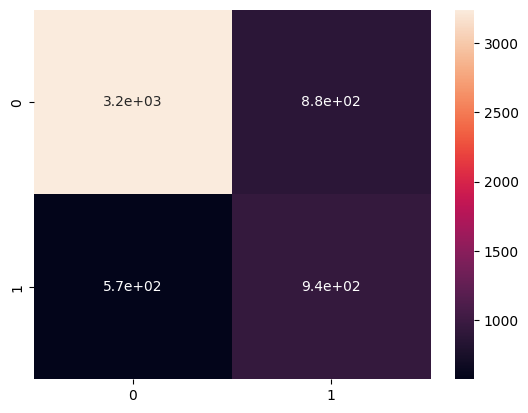

In [45]:
sns.heatmap(data=confusion_matrix(test_Y, y_pred), annot=True)
plt.show()